## A study on Logistic Regression
### 1. How to measure performance for binary classification of an unbalanced data set
### 2. Comparsion of using GridSearchCV and using LogisticRegressionCV

In [1]:
import sys
from platform import python_version

print(sys.version)
print(sys.version_info)
print(python_version())

3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]
sys.version_info(major=3, minor=6, micro=1, releaselevel='final', serial=0)
3.6.1


In [2]:
# Get the data. Data is not checked in.

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

df = pd.read_csv('C:/dev/research/temp/handson-unsupervised-learning/datasets/credit_card_data/credit_card.csv',  header=0, index_col=0)

### Data investigation

In [4]:
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# First let see how unbalanced the data is. Class [0,1] is the label

In [6]:
df.groupby('Class').count()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315,...,284315,284315,284315,284315,284315,284315,284315,284315,284315,284315
1,492,492,492,492,492,492,492,492,492,492,...,492,492,492,492,492,492,492,492,492,492


In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
# So it is very unbalanced. Cannot use accuracy to measure the performance of the model.

In [9]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
df['V1'].describe()

count    2.848070e+05
mean     3.919560e-15
std      1.958696e+00
min     -5.640751e+01
25%     -9.203734e-01
50%      1.810880e-02
75%      1.315642e+00
max      2.454930e+00
Name: V1, dtype: float64

In [11]:
np.isnan(df).sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
df.shape

(284807, 30)

In [13]:
df.V22.value_counts()

-0.816264    77
 0.844627    77
-0.984262    62
-0.080587    60
-0.996937    53
-0.072642    48
-0.692417    45
 0.096172    40
-0.650118    39
 0.250886    36
-1.068934    36
 0.367526    35
-0.835377    30
 0.278743    28
 0.691780    27
-1.148504    27
-0.522610    26
-0.476908    25
-0.008416    25
 0.665253    24
 0.811455    24
-0.204997    24
-0.525249    23
-0.272552    23
-0.427753    21
-0.376046    21
-0.279335    21
 0.349181    21
-0.834802    20
-0.126343    19
             ..
 0.503729     1
 1.545425     1
-0.427664     1
-0.832160     1
-0.061633     1
-0.414848     1
 1.098124     1
 0.847087     1
 0.815975     1
 1.221556     1
-0.656083     1
-0.669100     1
 1.975049     1
-0.935355     1
-0.761246     1
-1.108351     1
 0.808028     1
 0.420420     1
-0.117371     1
-0.314993     1
-0.346578     1
-0.063623     1
-0.835568     1
 0.480887     1
 0.792898     1
-1.052507     1
-1.893226     1
 0.087224     1
-0.572146     1
-0.126533     1
Name: V22, Length: 27566

In [14]:
df.groupby('Time').V22.nunique()

Time
0.0         2
1.0         2
2.0         2
4.0         1
7.0         2
9.0         1
10.0        3
11.0        1
12.0        3
13.0        1
14.0        1
15.0        1
16.0        1
17.0        1
18.0        2
22.0        2
23.0        4
24.0        1
25.0        1
26.0        2
27.0        2
29.0        2
32.0        2
33.0        2
34.0        4
35.0        3
36.0        3
37.0        1
38.0        1
39.0        2
           ..
172750.0    2
172751.0    2
172754.0    1
172756.0    1
172757.0    1
172758.0    1
172759.0    3
172760.0    1
172761.0    1
172762.0    3
172764.0    2
172766.0    3
172767.0    1
172768.0    4
172769.0    1
172770.0    2
172771.0    1
172774.0    2
172775.0    1
172777.0    1
172778.0    1
172780.0    1
172782.0    2
172783.0    1
172784.0    1
172785.0    1
172786.0    1
172787.0    1
172788.0    2
172792.0    1
Name: V22, Length: 124592, dtype: int64

In [15]:
# Now let's check correlation of features
# Pearson linear correlation to start with (checking the linear relationship between two sets of data)

In [16]:
# Takes infinite amount of time
# df['V1'].corr(df['V2'])

In [17]:
# correlation_matrix = df.corr(method='kendall')

# Logistic Regression with cross validation

In [18]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('C:/dev/research/temp/handson-unsupervised-learning/datasets/credit_card_data/credit_card.csv',  header=0, index_col=0)

# Time is the index
# Class will be the label column.

dataX = df.copy().drop(['Class'], axis=1)
dataY = df['Class'].copy()

# We need to standardize the featurs - mean 0 and std 1
features = dataX.columns
ss = preprocessing.StandardScaler()
dataX.loc[:, features] = ss.fit_transform(dataX[features])


In [19]:
# Let's train the model with vanilla setting (default)

In [20]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(dataX, dataY, test_size=0.33, random_state=2018, stratify=dataY)

model = LogisticRegression().fit(X_train, y_train)

In [21]:
model.score(X_train, y_train) # should be perfect

0.99924536212137094

In [22]:
model.predict_proba(X_test)

array([[  9.99914296e-01,   8.57038407e-05],
       [  9.99793655e-01,   2.06344603e-04],
       [  9.98564487e-01,   1.43551266e-03],
       ..., 
       [  9.99815069e-01,   1.84931306e-04],
       [  9.99582407e-01,   4.17593126e-04],
       [  9.99881760e-01,   1.18240208e-04]])

In [23]:
model.score(X_test, y_test)

0.99927649568557353

In [24]:
# We all know that for logistic regression it is not a good idea to use accuracy (why?). 
# Even more so for an unbalanced data like credit card frauds.

In [25]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [26]:
y_predict = model.predict(X_test)

#precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predict)

print( 'results', precision_recall_fscore_support(y_test, y_predict))

results (array([ 0.99947792,  0.85606061]), array([ 0.9997975 ,  0.69753086]), array([ 0.99963768,  0.76870748]), array([93825,   162], dtype=int64))


In [27]:
# What if we adjust the parameters a bit to see if it improves? Just change 1 variable at a time to see the effect

In [28]:
model = LogisticRegression(class_weight='balanced').fit(X_train, y_train)
y_predict_weight_balanced = model.predict(X_test)

#precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predict)

print('all results: \n', precision_recall_fscore_support(y_test, y_predict_weight_balanced))
print('precision score: ', precision_score(y_test, y_predict_weight_balanced))
print('recall score: ', recall_score(y_test, y_predict_weight_balanced))

all results: 
 (array([ 0.99984721,  0.06276506]), array([ 0.97644551,  0.91358025]), array([ 0.98800781,  0.11746032]), array([93825,   162], dtype=int64))
precision score:  0.0627650551315
recall score:  0.913580246914


In [29]:
# Something is really wrong, precision is so low for label 1. Let's change another varialbe
# random state, n_job etc.

In [87]:
model = LogisticRegression(C=1.0, penalty='l2', class_weight='balanced', random_state = 2018, solver = 'liblinear', n_jobs=-1).fit(X_train, y_train)
y_predict_weight_balanced = model.predict(X_test)

#precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_predict)

print('all results: \n', precision_recall_fscore_support(y_test, y_predict_weight_balanced))
print('precision score: ', precision_score(y_test, y_predict_weight_balanced))
print('recall score: ', recall_score(y_test, y_predict_weight_balanced))

all results: 
 (array([ 0.99984721,  0.06276506]), array([ 0.97644551,  0.91358025]), array([ 0.98800781,  0.11746032]), array([93825,   162], dtype=int64))
precision score:  0.0627650551315
recall score:  0.913580246914


### Precision Recall Curve

In [81]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

def find_precision_recall(X_test, model):
    y_proba = model.predict_proba(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test.values, y_proba[:,1])
    average_precision = average_precision_score(y_test.values, y_proba[:,1])
    return precision, recall, average_precision

In [63]:
y_proba[:,1]

array([ 0.01874889,  0.02563628,  0.29232078, ...,  0.02399362,
        0.03968114,  0.00741177])

In [53]:
np.where(y_predict_weight_balanced==1)

(array([   10,    53,    71, ..., 93793, 93858, 93962], dtype=int64),)

In [61]:
print(y_predict_weight_balanced[53])
print(y_proba[53])
print(y_predict_weight_balanced[10])
print(y_proba[10])
print(y_predict_weight_balanced[71])
print(y_proba[71])
print(y_predict_weight_balanced[72])
print(y_proba[72])

1
[ 0.31649485  0.68350515]
1
[ 0.46517439  0.53482561]
1
[ 0.32856478  0.67143522]
0
[ 0.96043678  0.03956322]


In [ ]:
# Now plot the precision recall curve

In [68]:
import matplotlib.pyplot as plt

def plot_precision_recall_curve(precision, recall, average_precision):
    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])

    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

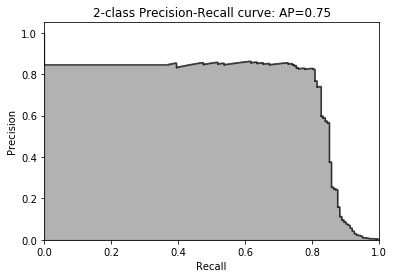

In [82]:
precision, recall, average_precision = find_precision_recall(X_test, model)
plot_precision_recall_curve(precision, recall, average_precision)

### ROC Curve

In [89]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def find_roc_data(y_test, model):
    y_proba = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test.values, y_proba[:,1])
    roc_area = roc_auc_score(y_test.values, y_proba[:,1])
    return fpr, tpr, roc_area

def plot_roc_curve(fpr, tpr, roc_area):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_area)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

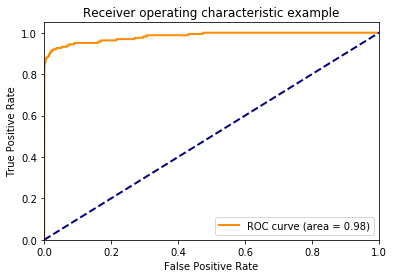

In [90]:
fpr, tpr, roc_area = find_roc_data(y_test, model)
plot_roc_curve(fpr, tpr, roc_area)

In [ ]:
# So there are rooms for improvement especially for recall. We want both high precision and high recall.
# 1. Try using logisticRegressionCV
# 2. Try using GridSearchCV

# Both are to fine tune hyperparameters

### 1. LogisticRegressionCV

In [92]:
from sklearn.linear_model import LogisticRegressionCV

n_model = LogisticRegressionCV(cv=10, random_state=2018, class_weight='balanced').fit(X_train, y_train)
y_predict_cv = n_model.predict(X_test)

print('all results: \n', precision_recall_fscore_support(y_test, y_predict_cv))
print('precision score: ', precision_score(y_test, y_predict_cv))
print('recall score: ', recall_score(y_test, y_predict_cv))

all results: 
 (array([ 0.99979485,  0.10407569]), array([ 0.98687983,  0.88271605]), array([ 0.99329536,  0.18619792]), array([93825,   162], dtype=int64))
precision score:  0.104075691412
recall score:  0.882716049383


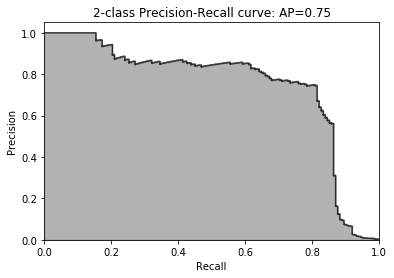

In [93]:
precision, recall, average_precision = find_precision_recall(X_test, n_model)
plot_precision_recall_curve(precision, recall, average_precision)

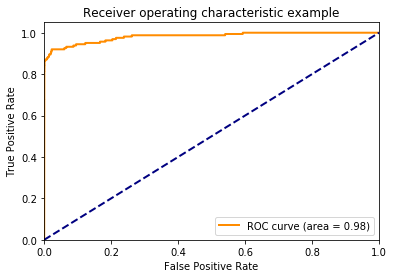

In [94]:
fpr, tpr, roc_area = find_roc_data(y_test, n_model)
plot_roc_curve(fpr, tpr, roc_area)

In [ ]:
# Looks like not much difference using logistic regression and the CV version of it.
# How can we improve it??

### Grid Search CV

In [97]:
from sklearn.model_selection import GridSearchCV

vanilla_model = LogisticRegression(class_weight='balanced')
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparametersToSearchWith = dict(C=C, penalty=penalty)
search_model = GridSearchCV(vanilla_model, hyperparametersToSearchWith, cv=5, verbose=0)

best_model = search_model.fit(X_train, y_train)

print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0
